In [220]:
# Importamos las librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

##### Tenemos en cuenta las características físicas y hábitos de la persona para que así podamos identificar en los histogramas lo que las personas suelen hacer.

In [221]:
# Carga de datos
data = pd.read_csv('reduced_health_data.csv')

En este bloque de código, estamos transformando la columna Age_Category del dataset data para convertir los rangos de edad en valores numéricos. Esto se realiza mediante un diccionario de mapeo age_mapping, que asigna un número único a cada rango de edad. La transformación se lleva a cabo con el método .map(), que aplica este diccionario a cada valor de la columna Age_Category.

In [222]:
age_mapping = {
    "18-24": 1,
    "25-29": 2,
    "30-34": 3,
    "35-39": 4,
    "40-44": 5,
    "45-49": 6,
    "50-54": 7,
    "55-59": 8,
    "60-64": 9,
    "65-69": 10,
    "70-74": 11,
    "75-79": 12,
    "80+": 13
}
data['Age_Category'] = data['Age_Category'].map(age_mapping)

En este bloque de código, utilizamos LabelEncoder para transformar variables categóricas en valores numéricos. Primero, aplicamos el LabelEncoder a la columna General_Health, nuestra variable objetivo. Luego, definimos una lista de otras columnas categóricas y creamos un diccionario para almacenar los encoders. Iteramos sobre cada columna, aplicamos el LabelEncoder y almacenamos cada encoder en el diccionario.

In [223]:
label_encoder = LabelEncoder()
data['General_Health'] = label_encoder.fit_transform(data['General_Health'])

# Codificar las variables categóricas restantes
categorical_columns = ['Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Smoking_History']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

##### Realizamos el separado de CSV's y el entrenamiento de 80%-20%.

In [224]:
# Primera división: Dividir data en train (80%) y test (20%)
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Segunda división: Dividir train en train2 (80%) y validation (20%) sin usar random_state o usando un valor diferente
train2, validation = train_test_split(train, test_size=0.2, random_state=24)

# Guardar en archivos CSV
train2.to_csv('train2.csv', index=False)
validation.to_csv('validation.csv', index=False)
test.to_csv('test.csv', index=False)

# Mostrar las formas de los datasets para verificar
print(f"train2 shape: {train2.shape}")
print(f"validation shape: {validation.shape}")
print(f"test shape: {test.shape}")

train2 shape: (197666, 19)
validation shape: (49417, 19)
test shape: (61771, 19)


##### Verificamos que los datasets creados esté correctos.

In [225]:
# Cargamos los DataFrames
train2_df = pd.read_csv('train2.csv')
validation_df = pd.read_csv('validation.csv')
test_df = pd.read_csv('test.csv')

# Mostramos las primeras filas de los DataFrames
print("Conjunto de Entrenamiento:")
print(train2_df.head())
print("\nConjunto de Validación:")
print(validation_df.head())
print("\nConjunto de Test:")
print(test_df.head())

Conjunto de Entrenamiento:
   General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0               3        4         0              0            0   
1               2        4         1              0            0   
2               2        0         0              0            0   
3               1        4         0              0            0   
4               0        4         1              0            0   

   Other_Cancer  Depression  Diabetes  Arthritis  Sex  Age_Category  \
0             1           1         0          1    0            10   
1             0           0         0          0    0             6   
2             0           0         0          0    1            10   
3             0           0         0          1    0             6   
4             0           0         0          1    1            10   

   Height_(cm)  Weight_(kg)    BMI  Smoking_History  Alcohol_Consumption  \
0        152.0        65.77  28.32                1          

En este bloque de código, utilizamos un Árbol de Decisión para identificar las variables más importantes del sistema. Entrenamos el modelo con nuestros datos y luego obtenemos la importancia de cada característica. Visualizamos esta información en un gráfico, lo que nos permite determinar cuáles variables tienen mayor impacto en la predicción y cuáles podrían ser eliminadas para simplificar el modelo.

                         Feature  Importance
12                           BMI    0.169333
11                   Weight_(kg)    0.114172
17       FriedPotato_Consumption    0.106375
15             Fruit_Consumption    0.105860
9                   Age_Category    0.103681
16  Green_Vegetables_Consumption    0.097163
10                   Height_(cm)    0.082281
14           Alcohol_Consumption    0.073215
0                        Checkup    0.034866
6                       Diabetes    0.019354
8                            Sex    0.016816
3                    Skin_Cancer    0.015075
13               Smoking_History    0.014507
1                       Exercise    0.013125
4                   Other_Cancer    0.010748
7                      Arthritis    0.010467
2                  Heart_Disease    0.006713
5                     Depression    0.006250


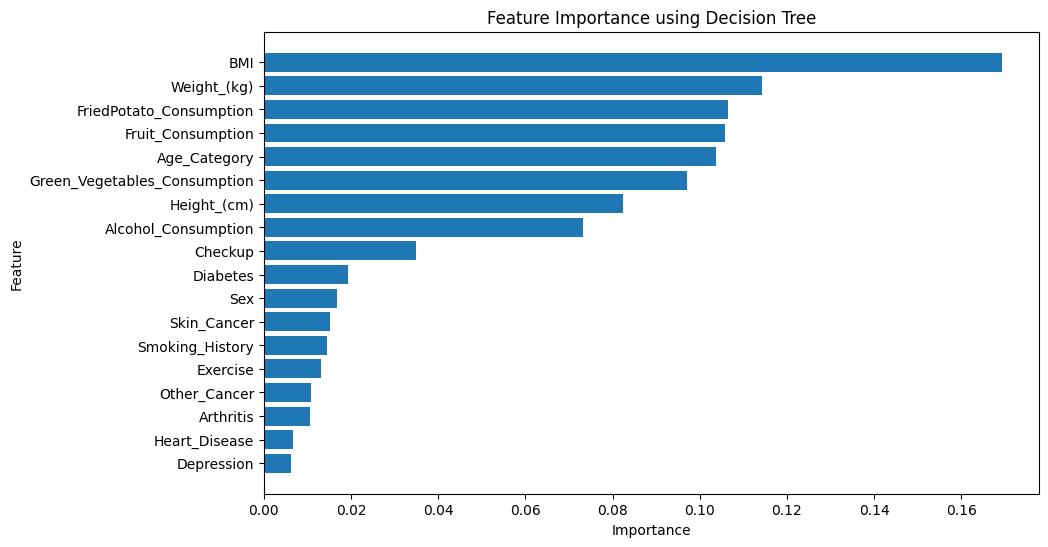

In [226]:
# Separar características y etiqueta
X = data.drop('General_Health', axis=1)
y = data['General_Health']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar un árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = tree_model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Decision Tree')
plt.gca().invert_yaxis()
plt.show()


#### Teniendo en cuenta que el algoritmo no nos permitió mostrar el árbol en sí, se decidió realizar una gráfico en el cual demostramos los resultados obtenidos por el árbol de decisión.

In [227]:
# Establecer un umbral de importancia por debajo del cual se eliminarán las características
threshold = 0.05
# Identificar las características a eliminar
features_to_drop = feature_importance_df[feature_importance_df['Importance'] < threshold]['Feature'].tolist()
print("Características a eliminar:", features_to_drop)

# Crear un nuevo dataset eliminando las características de bajo impacto
train2_df = train2_df.drop(columns=features_to_drop)
validation_df = validation_df.drop(columns=features_to_drop)
test_df = test_df.drop(columns=features_to_drop)
# Guardar el nuevo dataset a un archivo CSV
train2_df.to_csv('train2_arbol.csv', index=False)
validation_df.to_csv('validation_arbol.csv', index=False)
test_df.to_csv('test_arbol.csv', index=False)
# Confirmar que el nuevo dataset se ha guardado correctamente
print("Conjunto de Entrenamiento:")
print(train2_df.head())
print("\nConjunto de Validación:")
print(validation_df.head())
print("\nConjunto de Validación:")
print(test_df.head())

Características a eliminar: ['Checkup', 'Diabetes', 'Sex', 'Skin_Cancer', 'Smoking_History', 'Exercise', 'Other_Cancer', 'Arthritis', 'Heart_Disease', 'Depression']
Conjunto de Entrenamiento:
   General_Health  Age_Category  Height_(cm)  Weight_(kg)    BMI  \
0               3            10        152.0        65.77  28.32   
1               2             6        160.0        49.90  19.49   
2               2            10        180.0        96.16  29.57   
3               1             6        140.0        61.23  31.38   
4               0            10        173.0        79.38  26.61   

   Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  \
0                  0.0               60.0                         120.0   
1                 28.0               60.0                           8.0   
2                  0.0               20.0                           6.0   
3                  1.0               16.0                           3.0   
4                  5.0  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


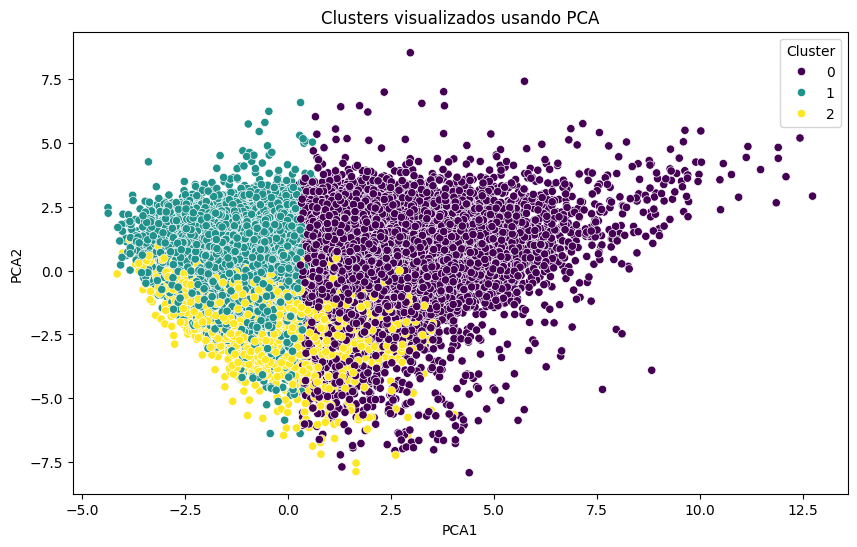

Centros de los clusters (en escala original):
 [[  2.32068014   6.99298846 175.79100264 106.23459656  34.64287709
    2.51141925  24.19911532  12.15066194   8.26927783]
 [  2.22480453   7.75107553 166.69328682  70.94033426  25.58868729
    2.13192548  33.22955557  16.23834686   5.04751038]
 [  2.35768803   7.98454983 174.04987032  80.54711523  26.50695072
   23.00196369  29.17776954  17.50989255   6.56706187]]
Tamaño de cada cluster:
 Cluster
1    106828
0     63906
2     26932
Name: count, dtype: int64


In [228]:
scaler = StandardScaler()
train2_scaled = scaler.fit_transform(train2_df)

# Entrenar el modelo KMeans en el conjunto de datos de entrenamiento escalado
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(train2_scaled)

# Agregar las etiquetas de los clusters al conjunto de datos de entrenamiento
train2_df['Cluster'] = kmeans.labels_

# Reducción de dimensionalidad para visualización usando PCA en el conjunto de datos de entrenamiento escalado
pca = PCA(n_components=2)  # Solo para visualización
train2_pca = pca.fit_transform(train2_scaled)

# Crear un DataFrame con los datos reducidos y las etiquetas de los clusters
df_pca = pd.DataFrame(train2_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = kmeans.labels_

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Clusters visualizados usando PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Mostrar los centros de los clusters
print("Centros de los clusters (en escala original):\n", scaler.inverse_transform(kmeans.cluster_centers_))

# Mostrar un resumen de los clusters
print("Tamaño de cada cluster:\n", train2_df['Cluster'].value_counts())

# Eliminar la columna 'Cluster' del conjunto de datos de entrenamiento
train2_df = train2_df.drop('Cluster', axis=1, errors='ignore')

#### Con el resultado obtenido por los clusters en el gráfico anterior, podemos identificar que el PCA1 representa la primera componente principal, que es una combinación lineal de las características originales y captura la mayor parte de la variabilidad del dataset. Por otro lado, PCA2 representa la segunda componente principal, que captura la mayor
 cantidad de variabilidad restante después de PCA1.

#### Además de esto, cada grupo está separado debido al K-means y su separación por colores.

#### Cluster 0 (Púrpura):

- Los puntos púrpuras se encuentran principalmente en la parte inferior derecha del gráfico.
Este cluster muestra una densidad más alta en la parte negativa de PCA2 y extendida a lo largo de PCA1.
#### Cluster 1 (Verde):

- Los puntos verdes se agrupan en la parte inferior izquierda del gráfico.
Este cluster muestra una densidad más alta en las partes negativas tanto de PCA1 como de PCA2.
#### Cluster 2 (Amarillo):

- Los puntos amarillos se concentran en la parte superior del gráfico.
Este cluster muestra una densidad más alta en la parte positiva de PCA2 y extendida a lo largo de PCA1.

Se están separando las características (X) y la etiqueta objetivo (y) para los conjuntos de datos de entrenamiento, validación y prueba. Esto permite preparar los datos para el entrenamiento y la evaluación del modelo.

In [229]:
X_train = train2_df.drop('General_Health', axis=1)
y_train = train2_df['General_Health']
X_val = validation_df.drop('General_Health', axis=1)
y_val = validation_df['General_Health']
X_test = test_df.drop('General_Health', axis=1)
y_test = test_df['General_Health']

Se está escalando las características de los conjuntos de datos de entrenamiento, validación y prueba utilizando StandardScaler. Primero se ajusta el escalador a los datos de entrenamiento y luego se aplican las mismas transformaciones a los datos de validación y prueba para asegurar la coherencia.

In [230]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Se está reduciendo el tamaño del conjunto de datos de entrenamiento para la búsqueda de hiperparámetros, seleccionando aleatoriamente el 10% de los datos de entrenamiento escalados. Esto permite que la búsqueda de hiperparámetros sea más rápida y eficiente.

In [231]:
# Reducir el tamaño del dataset para la búsqueda de hiperparámetros
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_scaled, y_train, train_size=0.1, random_state=42)

Se define un diccionario param_dist que contiene los rangos de hiperparámetros a explorar durante la búsqueda de hiperparámetros. Estos incluyen el número de árboles (n_estimators), el número máximo de características a considerar para cada división (max_features), la profundidad máxima de los árboles (max_depth) y el criterio de calidad para las divisiones (criterion).

In [232]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy']
}

Se crea una instancia del clasificador RandomForestClassifier con un valor de random_state fijo para garantizar la reproducibilidad de los resultados.

In [233]:
rf = RandomForestClassifier(random_state=42)

Se configura RandomizedSearchCV para realizar una búsqueda aleatoria de hiperparámetros utilizando el clasificador RandomForestClassifier. Se especifican el número de iteraciones (n_iter=10), la validación cruzada con 3 particiones (cv=3), el uso de todos los núcleos disponibles (n_jobs=-1), la verbosidad para ver el progreso (verbose=2) y un random_state fijo para reproducibilidad.

In [234]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)

Se realiza la búsqueda aleatoria de hiperparámetros ajustando RandomizedSearchCV con una muestra del conjunto de entrenamiento (X_train_sample y y_train_sample). Luego, se imprimen los mejores hiperparámetros encontrados (random_search.best_params_). Con estos hiperparámetros, se entrena un nuevo RandomForestClassifier utilizando todo el conjunto de entrenamiento escalado (X_train_scaled y y_train).

In [235]:
random_search.fit(X_train_sample, y_train_sample)
print("Mejores hiperparámetros:", random_search.best_params_)
best_rf = RandomForestClassifier(**random_search.best_params_, random_state=42)
best_rf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores hiperparámetros: {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}


RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)

Se están realizando predicciones en el conjunto de entrenamiento escalado, calculando la exactitud de estas predicciones y generando un reporte de clasificación detallado.

In [236]:
y_train_pred = best_rf.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Exactitud en entrenamiento:", train_accuracy)
print("Reporte de clasificación en entrenamiento:\n", classification_report(y_train, y_train_pred))

Exactitud en entrenamiento: 0.42686147339451397
Reporte de clasificación en entrenamiento:
               precision    recall  f1-score   support

           0       0.53      0.07      0.12     35621
           1       0.68      0.03      0.06     22972
           2       0.42      0.50      0.45     61288
           3       1.00      0.01      0.01      7221
           4       0.43      0.72      0.54     70564

    accuracy                           0.43    197666
   macro avg       0.61      0.26      0.24    197666
weighted avg       0.49      0.43      0.36    197666



Se realizan predicciones en el conjunto de validación escalado (X_val_scaled) utilizando el modelo best_rf entrenado. Luego, se calcula la exactitud de las predicciones (val_accuracy) y se imprime. Finalmente, se genera y muestra un reporte de clasificación (classification_report) que proporciona detalles adicionales sobre el rendimiento del modelo en el conjunto de validación.

In [237]:
y_val_pred = best_rf.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Exactitud en validación:", val_accuracy)
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

Exactitud en validación: 0.401987170406945
Reporte de clasificación en validación:
               precision    recall  f1-score   support

           0       0.45      0.05      0.10      8994
           1       0.37      0.01      0.03      5672
           2       0.39      0.47      0.42     15292
           3       0.00      0.00      0.00      1845
           4       0.41      0.69      0.51     17614

    accuracy                           0.40     49417
   macro avg       0.32      0.24      0.21     49417
weighted avg       0.39      0.40      0.33     49417



Se están realizando predicciones en el conjunto de prueba escalado, calculando la exactitud de estas predicciones y generando un reporte de clasificación detallado.

In [238]:
y_test_pred = best_rf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Exactitud en prueba:", test_accuracy)
print("Reporte de clasificación en prueba:\n", classification_report(y_test, y_test_pred))

Exactitud en prueba: 0.40067345518123393
Reporte de clasificación en prueba:
               precision    recall  f1-score   support

           0       0.46      0.05      0.10     11339
           1       0.37      0.01      0.02      7166
           2       0.38      0.46      0.42     18784
           3       0.50      0.00      0.00      2265
           4       0.41      0.69      0.52     22217

    accuracy                           0.40     61771
   macro avg       0.42      0.24      0.21     61771
weighted avg       0.41      0.40      0.33     61771



Se está realizando la predicción de la salud general para un dato nuevo inventado, escalando el dato con StandardScaler y utilizando el modelo entrenado best_rf para hacer la predicción.

In [239]:
# Predecir un dato nuevo inventado
nuevo_dato = np.array([[1, 0, 1, 0, 0, 0, 0, 1]])
nuevo_dato_scaled = scaler.transform(nuevo_dato)
prediccion_nueva = best_rf.predict(nuevo_dato_scaled)
print("Predicción para el nuevo dato inventado de su salud en general:", prediccion_nueva)

Predicción para el nuevo dato inventado de su salud en general: [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Se están creando un DataFrame con los resultados de la búsqueda de hiperparámetros, y luego se imprimen las columnas que muestran el puntaje medio de validación (mean_test_score), la desviación estándar del puntaje de validación (std_test_score) y los parámetros (params) de cada combinación de hiperparámetros evaluada.

In [240]:
results = pd.DataFrame(random_search.cv_results_)
print(results[['mean_test_score', 'std_test_score', 'params']])

   mean_test_score  std_test_score  \
0         0.371345        0.001867   
1         0.397349        0.003567   
2         0.376354        0.003408   
3         0.373419        0.002486   
4         0.374380        0.003630   
5         0.372003        0.002820   
6         0.371092        0.001551   
7         0.368259        0.002942   
8         0.398057        0.006138   
9         0.375949        0.002711   

                                              params  
0  {'n_estimators': 100, 'max_features': 'sqrt', ...  
1  {'n_estimators': 100, 'max_features': 'sqrt', ...  
2  {'n_estimators': 300, 'max_features': 'sqrt', ...  
3  {'n_estimators': 200, 'max_features': 'sqrt', ...  
4  {'n_estimators': 400, 'max_features': 'log2', ...  
5  {'n_estimators': 400, 'max_features': 'log2', ...  
6  {'n_estimators': 100, 'max_features': 'sqrt', ...  
7  {'n_estimators': 100, 'max_features': 'sqrt', ...  
8  {'n_estimators': 500, 'max_features': 'sqrt', ...  
9  {'n_estimators': 300, 'max_f